# Import libraries

In [ ]:
!pip install kneed

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from kmodes.kmodes import KModes


# Import data

In [ ]:
df= pd.read_csv('/content/data_uas.csv', sep = ";")
df.head()

,Timestamp,Nama,Usia,Jenis Kelamin,Angkatan,alasan,kepuasan,prioritas_liniear,prioritas_terkait,minat_karir,bidang,lingkungan,faktor_gaji,faktor_lokasi,faktor_pengembangan,faktor_stabilitas,faktor_luar,kemampuan,magang
0,27/05/2024 08:17,Vania,20,Perempuan,2022,Peluang karir,3,4,4,Business Intelligence Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,3,3,2,3,Belum
1,27/05/2024 08:20,Cindashany P,19,Perempuan,2022,Peluang karir,3,2,4,Data Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,2,3,2,1,Belum
2,27/05/2024 08:20,salwa,19,Perempuan,2022,Rekomendasi keluarga atau teman,3,3,5,Data Scientist,Teknologi Informasi,Kombinasi WFH & WFO,4,4,4,4,3,2,Belum
3,27/05/2024 08:23,Intan,20,Perempuan,2022,Peluang karir,4,4,5,Data Engineer,Pemerintahan,Kombinasi WFH & WFO,5,3,4,5,5,3,Belum
4,27/05/2024 08:23,nala,19,Perempuan,2022,Peluang karir,4,5,4,Data Scientist,Keuangan,Remote Work,4,4,5,5,5,3,Belum


# Data understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            117 non-null    object
 1   Nama                 117 non-null    object
 2   Usia                 117 non-null    int64 
 3   Jenis Kelamin        117 non-null    object
 4   Angkatan             117 non-null    int64 
 5   alasan               117 non-null    object
 6   kepuasan             117 non-null    int64 
 7   prioritas_liniear    117 non-null    int64 
 8   prioritas_terkait    117 non-null    int64 
 9   minat_karir          117 non-null    object
 10  bidang               117 non-null    object
 11  lingkungan           117 non-null    object
 12  faktor_gaji          117 non-null    int64 
 13  faktor_lokasi        117 non-null    int64 
 14  faktor_pengembangan  117 non-null    int64 
 15  faktor_stabilitas    117 non-null    int64 
 16  faktor_l

## Cek Nilai Unik Tiap Kolom

In [ ]:
for column in df:
    print(f"Nilai unik untuk kolom '{column}':")
    print(df[column].unique())
    print()

Nilai unik untuk kolom 'Timestamp':
['27/05/2024 08:17' '27/05/2024 08:20' '27/05/2024 08:23'
 '27/05/2024 08:26' '27/05/2024 08:30' '27/05/2024 08:31'
 '27/05/2024 08:32' '27/05/2024 08:33' '27/05/2024 08:34'
 '27/05/2024 08:36' '27/05/2024 08:41' '27/05/2024 08:44'
 '27/05/2024 08:46' '27/05/2024 08:49' '27/05/2024 08:55'
 '27/05/2024 08:59' '27/05/2024 09:02' '27/05/2024 09:04'
 '27/05/2024 09:05' '27/05/2024 09:07' '27/05/2024 09:10'
 '27/05/2024 09:17' '27/05/2024 09:19' '27/05/2024 09:23'
 '27/05/2024 09:33' '27/05/2024 09:35' '27/05/2024 09:38'
 '27/05/2024 09:47' '27/05/2024 09:59' '27/05/2024 11:37'
 '27/05/2024 11:44' '27/05/2024 12:06' '27/05/2024 12:21'
 '27/05/2024 13:45' '27/05/2024 13:47' '27/05/2024 13:53'
 '27/05/2024 13:54' '27/05/2024 13:57' '27/05/2024 13:58'
 '27/05/2024 14:04' '27/05/2024 14:07' '27/05/2024 14:10'
 '27/05/2024 14:23' '27/05/2024 14:33' '27/05/2024 15:47'
 '27/05/2024 15:51' '27/05/2024 16:35' '27/05/2024 17:02'
 '27/05/2024 17:06' '27/05/2024 17:0

In [ ]:
df.shape

(117, 19)

In [ ]:
df.isnull().sum()

Timestamp              0
Nama                   0
Usia                   0
Jenis Kelamin          0
Angkatan               0
alasan                 0
kepuasan               0
prioritas_liniear      0
prioritas_terkait      0
minat_karir            0
bidang                 0
lingkungan             0
faktor_gaji            0
faktor_lokasi          0
faktor_pengembangan    0
faktor_stabilitas      0
faktor_luar            0
kemampuan              0
magang                 0
dtype: int64

## Drop Irrelevan Atribut

In [ ]:
df.drop(columns=['Timestamp', 'Nama ', "prioritas_terkait"], inplace=True)
df.head()

,Usia,Jenis Kelamin,Angkatan,alasan,kepuasan,prioritas_liniear,minat_karir,bidang,lingkungan,faktor_gaji,faktor_lokasi,faktor_pengembangan,faktor_stabilitas,faktor_luar,kemampuan,magang
0,20,Perempuan,2022,Peluang karir,3,4,Business Intelligence Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,3,3,2,3,Belum
1,19,Perempuan,2022,Peluang karir,3,2,Data Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,2,3,2,1,Belum
2,19,Perempuan,2022,Rekomendasi keluarga atau teman,3,3,Data Scientist,Teknologi Informasi,Kombinasi WFH & WFO,4,4,4,4,3,2,Belum
3,20,Perempuan,2022,Peluang karir,4,4,Data Engineer,Pemerintahan,Kombinasi WFH & WFO,5,3,4,5,5,3,Belum
4,19,Perempuan,2022,Peluang karir,4,5,Data Scientist,Keuangan,Remote Work,4,4,5,5,5,3,Belum


In [ ]:
df.shape

(117, 16)

# EDA

In [ ]:
categorical = df[["Angkatan","Usia","Jenis Kelamin", "alasan", "minat_karir", "bidang", "lingkungan", "magang"]]
ordinals = df[["kepuasan", "prioritas_liniear", "faktor_gaji", "faktor_lokasi", "faktor_pengembangan", "faktor_stabilitas", "faktor_luar", "kemampuan"]]

### Visualisasi Atribut Kategorik

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


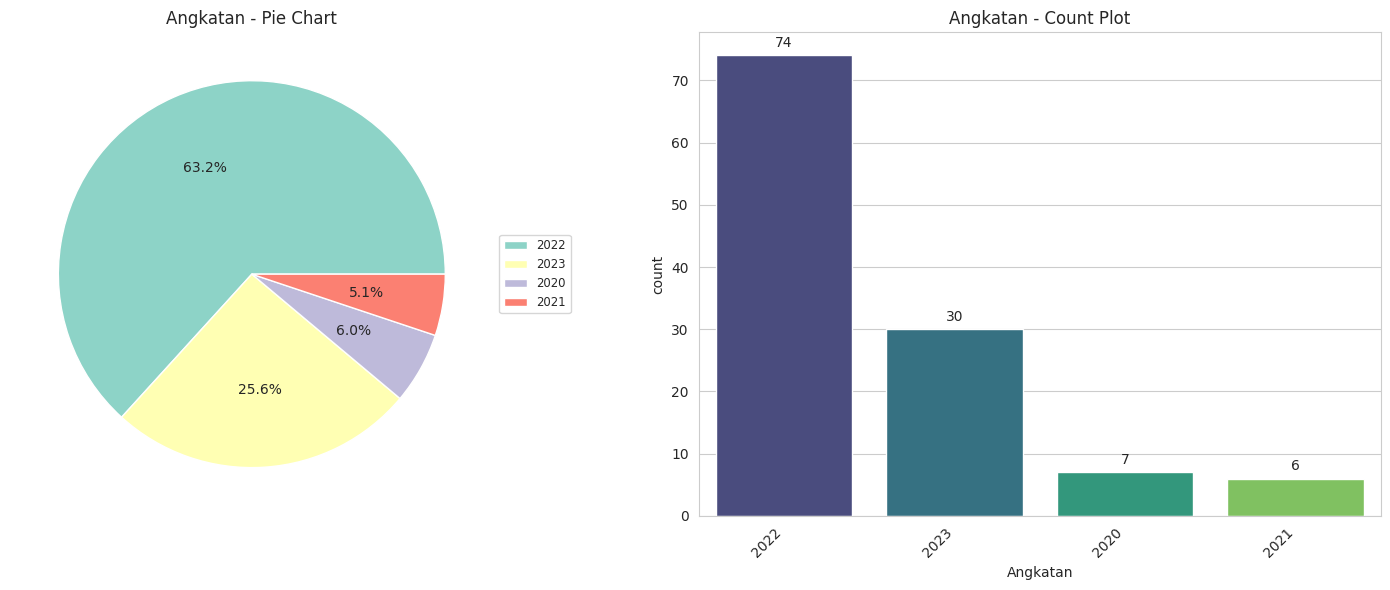

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


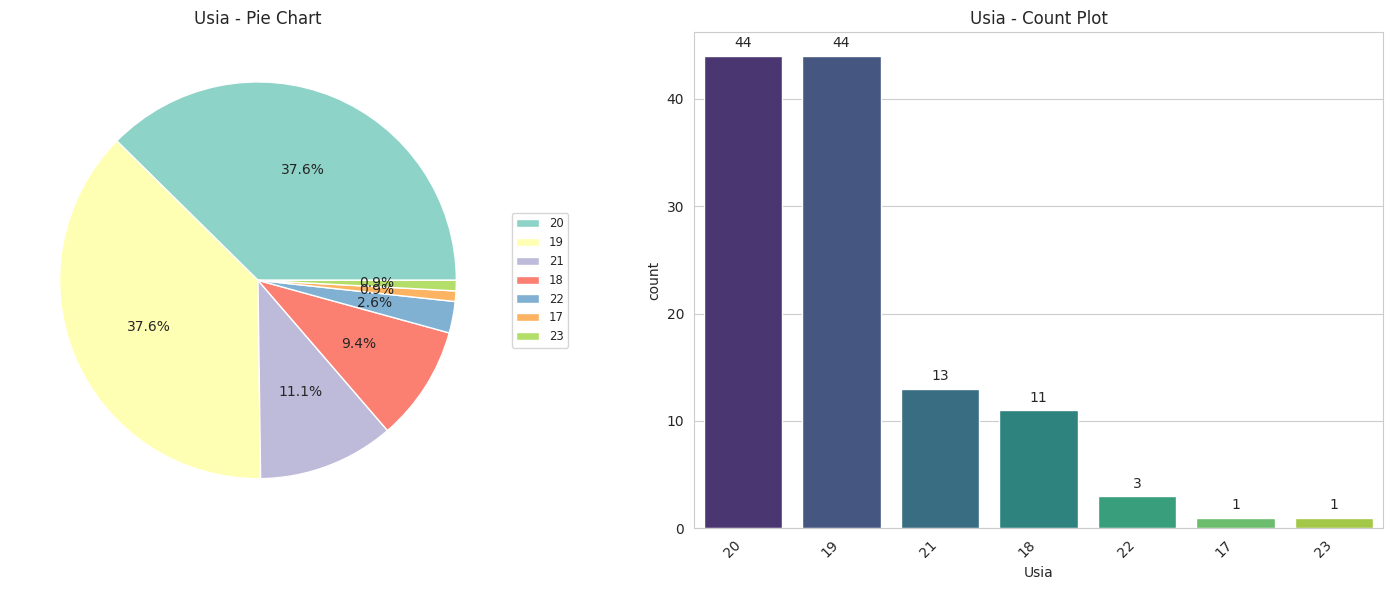

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


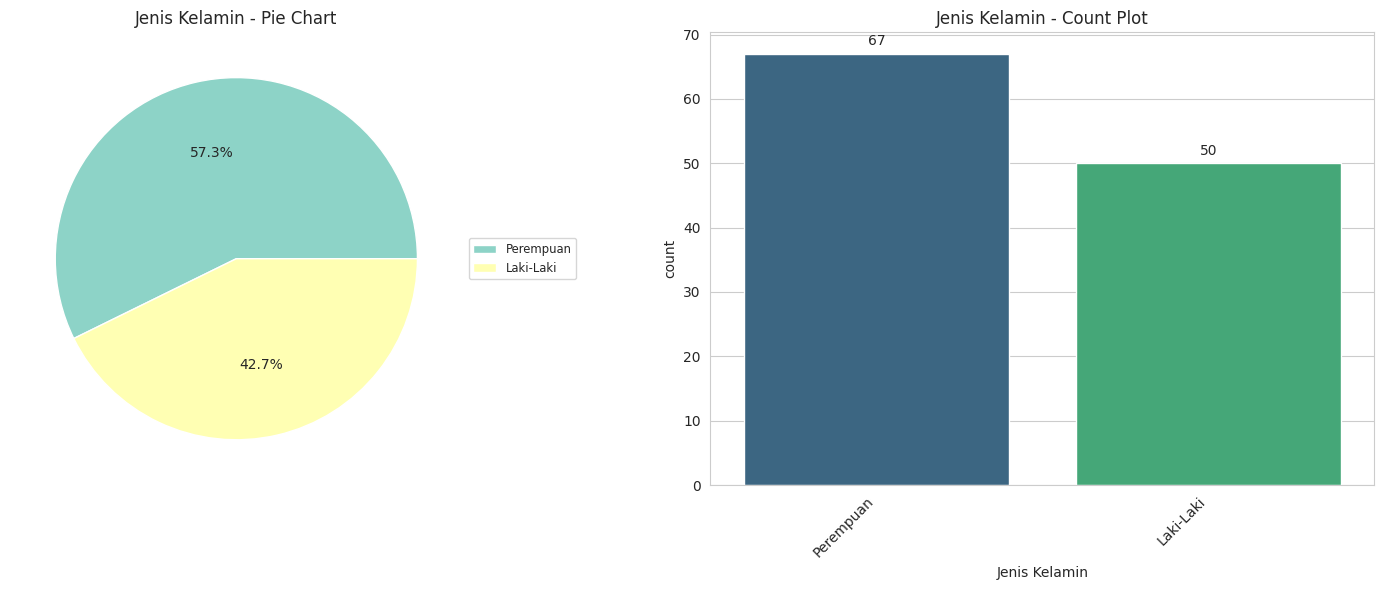

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


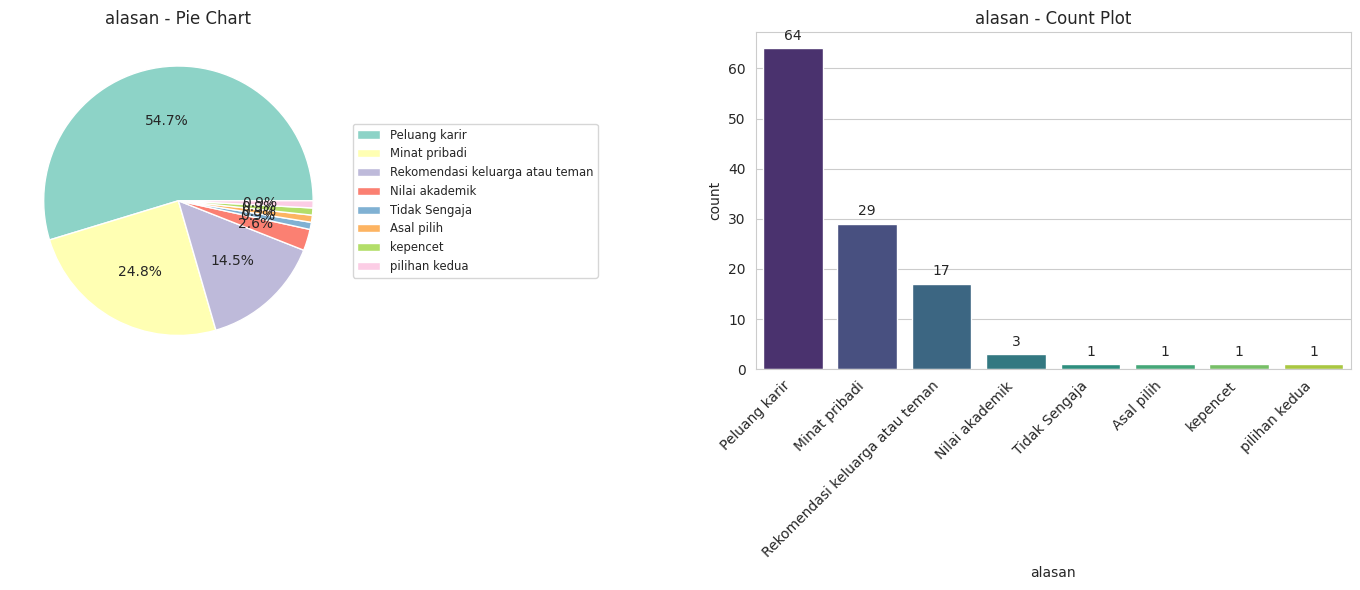

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


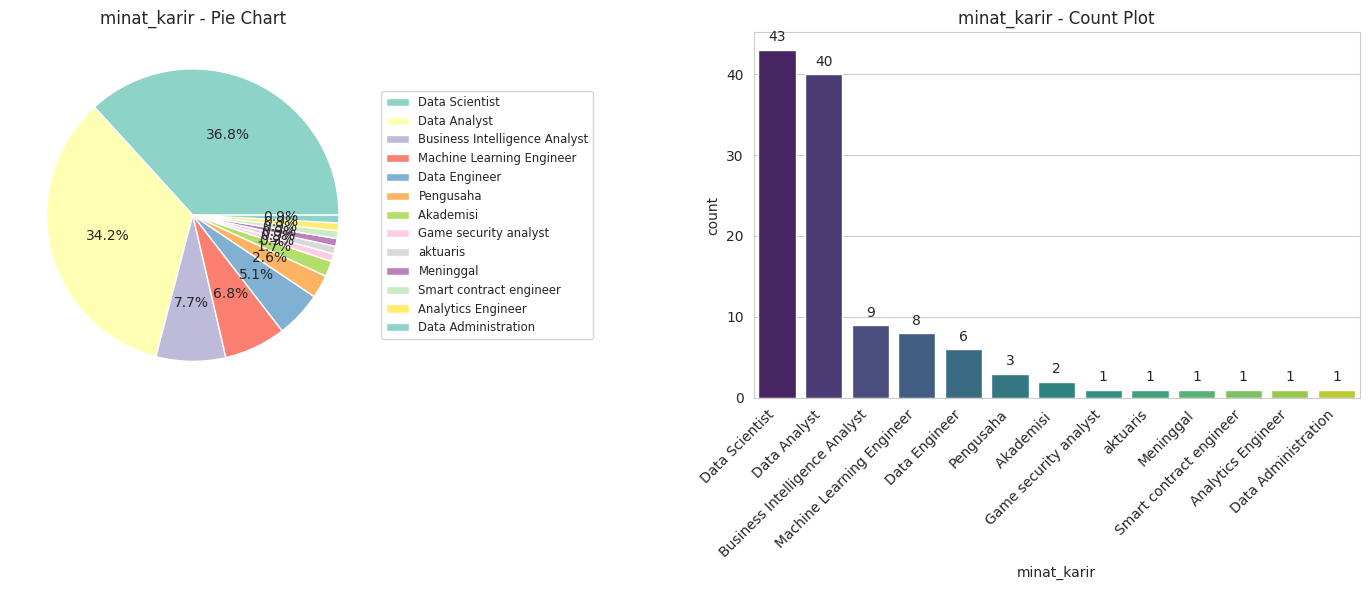

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


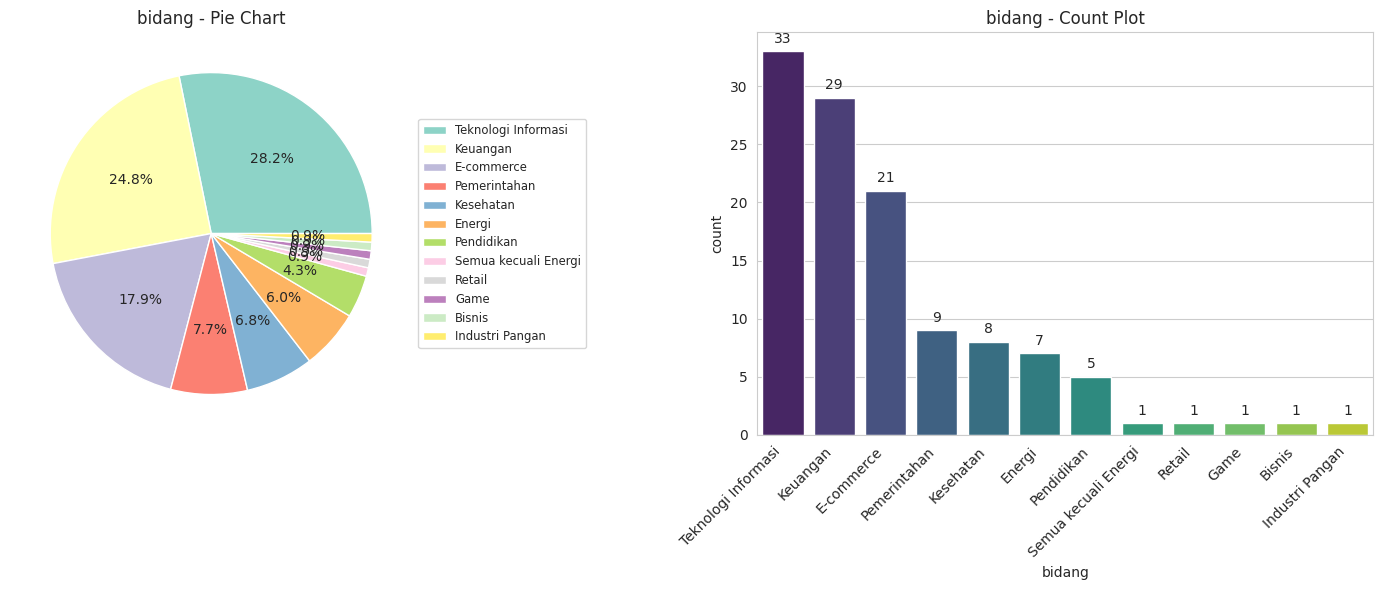

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


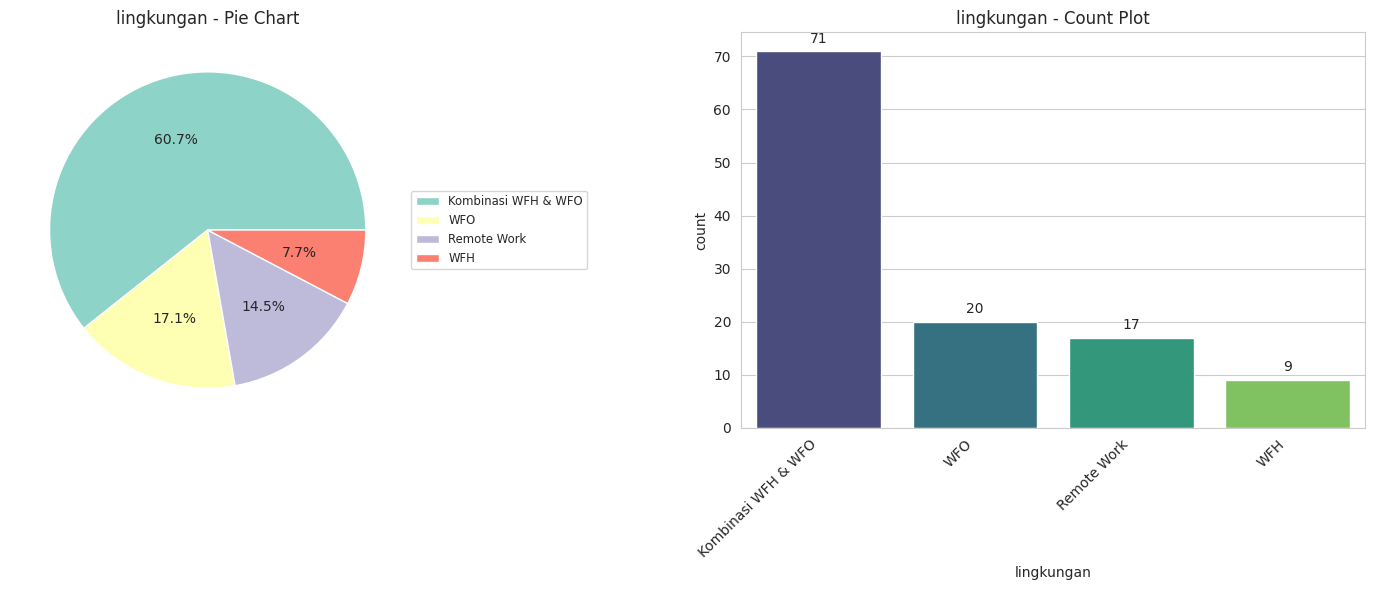

<ipython-input-26-a970abd8ea72>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)


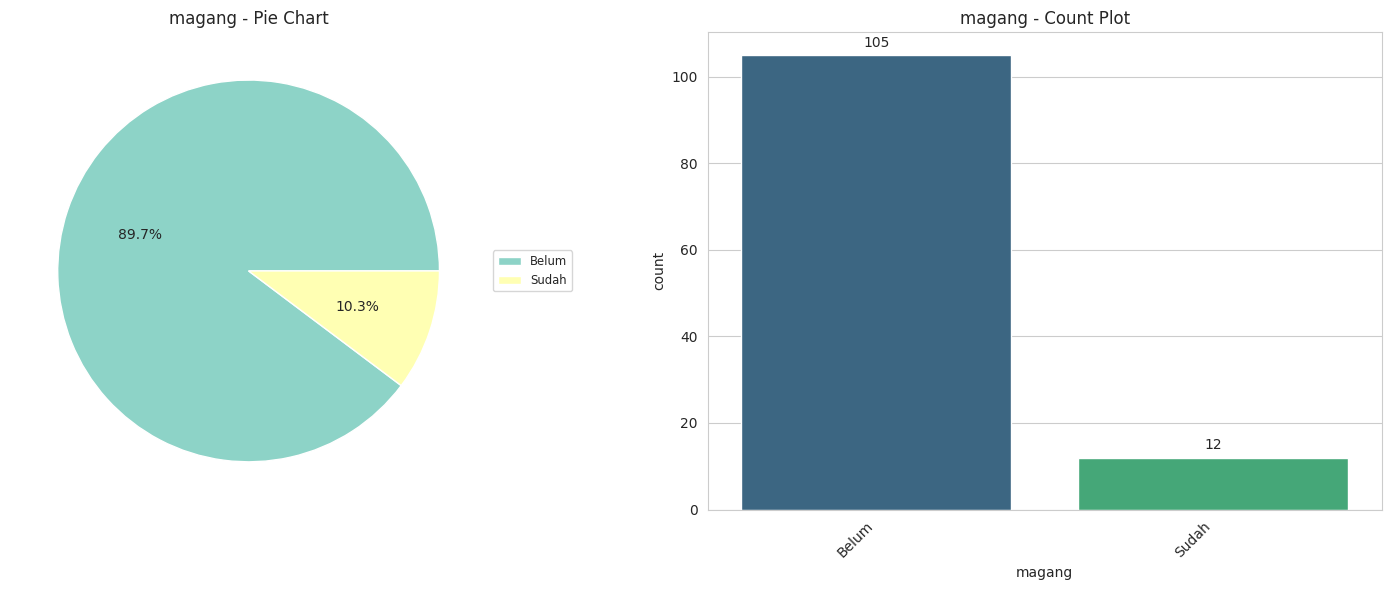

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_categorical(data, categoricals, top_n=10):
    # Set seaborn style
    sns.set_style("whitegrid")

    for column in categoricals:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))

        if len(data[column].unique()) > 30:
            top_categories = data[column].value_counts().head(top_n).index
            data_to_plot = data[data[column].isin(top_categories)]
        else:
            data_to_plot = data

        # Pie chart
        pie_colors = sns.color_palette("Set3", len(data_to_plot[column].unique()))
        pie_data = data_to_plot[column].value_counts()
        pie_data.plot.pie(autopct='%1.1f%%', ax=axes[0], colors=pie_colors, labels=['' for _ in range(len(pie_data))])
        axes[0].set_title(f'{column} - Pie Chart')
        axes[0].set_ylabel('')  # Remove y-label for better visualization
        axes[0].legend(pie_data.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=1)  # Adjust legend position

        # Count plot
        bar_colors = sns.color_palette("viridis", len(data_to_plot[column].unique()))
        count_plot = sns.countplot(data=data_to_plot, x=column, order=data_to_plot[column].value_counts().index, ax=axes[1], palette=bar_colors)
        axes[1].set_title(f'{column} - Count Plot')
        axes[1].tick_params(axis='x', rotation=45)

        # Adding counts on top of the bars
        for p in count_plot.patches:
            count_plot.annotate(format(p.get_height(), '.0f'),
                                (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha = 'center', va = 'center',
                                xytext = (0, 9),  # Offset label to avoid overlap
                                textcoords = 'offset points')

        # Adjust x-tick labels to prevent overlap
        for tick in axes[1].get_xticklabels():
            tick.set_rotation(45)
            tick.set_ha('right')  # Align labels to the right for better readability

        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

visualize_categorical(df, categorical)


### Visualisasi Atribut Ordinal


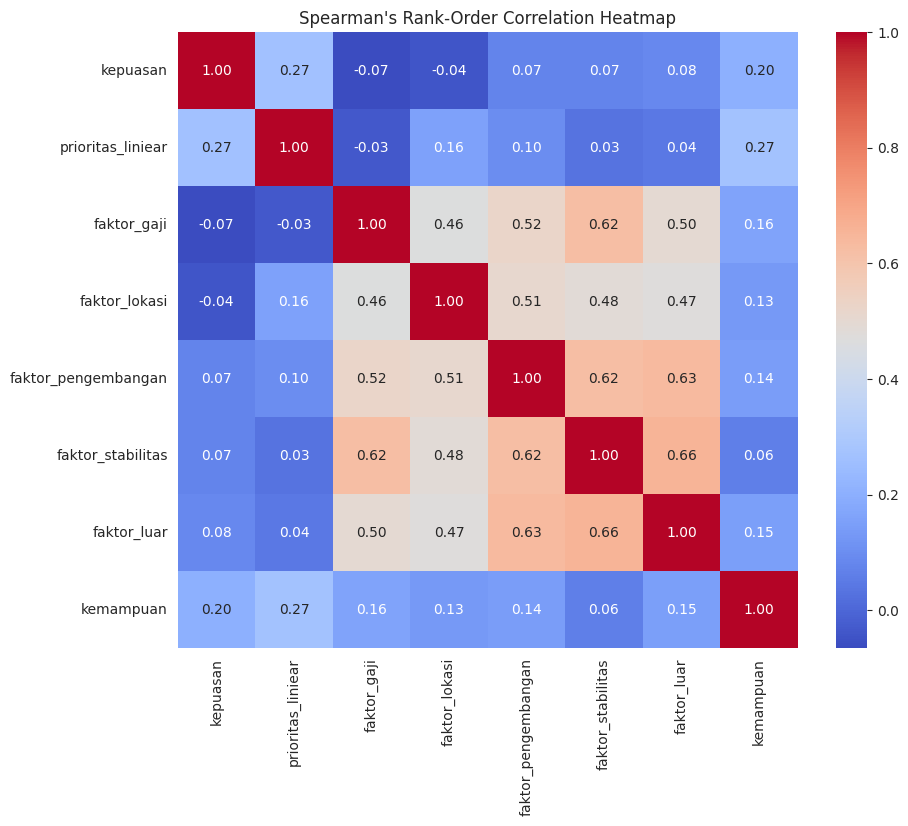

In [ ]:
spearman_corr = ordinals.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman's Rank-Order Correlation Heatmap")
plt.show()

In [ ]:
# def categorize_value(value):
#     if value == 1:
#         return "sangat tidak penting"
#     elif value == 2:
#         return "tidak penting"
#     elif value == 3:
#         return "sedang"
#     elif value == 4:
#         return "penting"
#     elif value == 5:
#         return "sangat penting"
#     else:
#         return "tidak diketahui"

# # Fungsi untuk mengkategorisasikan semua faktor
# def categorize(faktor2):
#     return faktor2.applymap(categorize_value)

# # Panggil fungsi dengan DataFrame 'faktor2'
# faktor2 = ordinals
# faktor2_kategoris = categorize(faktor2)

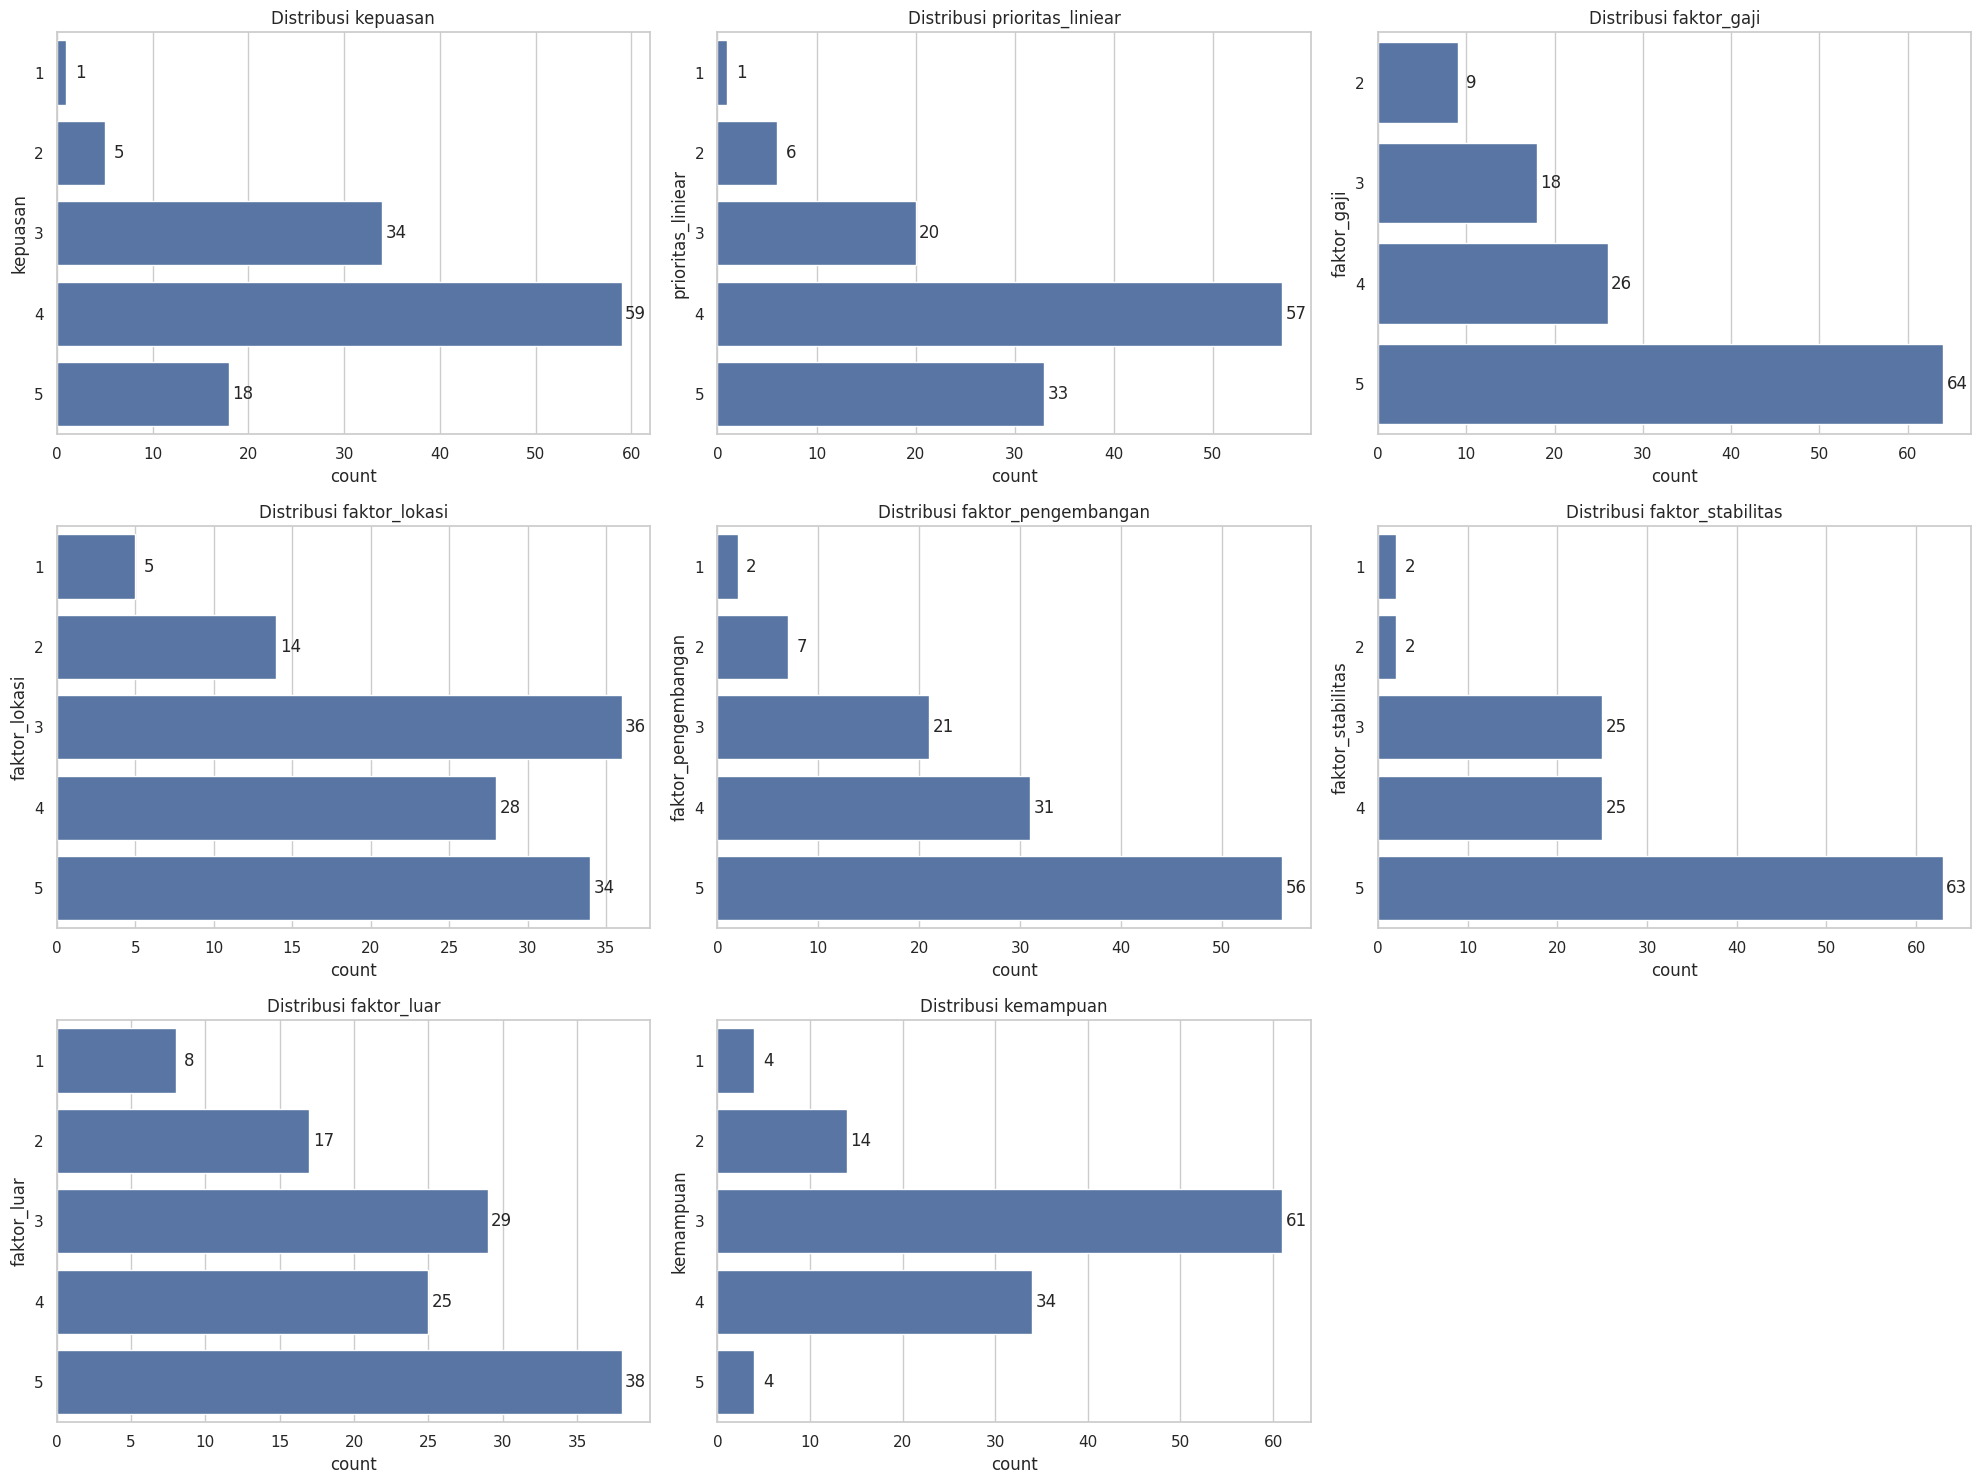

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

# Get a list of all columns in the dataset
columns = ordinals.columns

# Calculate the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

# Plot the distribution of each categorical variable
for i, column in enumerate(columns, 1):
    plt.subplot(n_rows, n_cols, i)
    count_plot = sns.countplot(y=column, data=ordinals)
    plt.title(f'Distribusi {column}')

    # Adding counts on top of the bars
    for p in count_plot.patches:
        count_plot.annotate(format(p.get_width(), '.0f'),
                            (p.get_width(), p.get_y() + p.get_height() / 2.),
                            ha='center', va='center',
                            xytext=(10, 0),  # Offset label to avoid overlap
                            textcoords='offset points')

plt.tight_layout()
plt.show()


### Visualisasi Faktor Pemilihan Kerja

In [ ]:
faktor = df[['prioritas_liniear', 'faktor_gaji', 'faktor_lokasi', 'faktor_pengembangan', 'faktor_stabilitas', 'faktor_luar']]
faktor.head()

,prioritas_liniear,faktor_gaji,faktor_lokasi,faktor_pengembangan,faktor_stabilitas,faktor_luar
0,4,3,2,3,3,2
1,2,3,2,2,3,2
2,3,4,4,4,4,3
3,4,5,3,4,5,5
4,5,4,4,5,5,5


### Identifikasi Hubungan Antar Variabel

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# List of columns to perform Chi-Square test
columns = df.columns

# Create an empty DataFrame to store results
chi_square_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Chi2', 'p-value', 'dof'])

# Iterate over each pair of columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]

        # Create a contingency table
        contingency_table = pd.crosstab(df[col1], df[col2])

        # Perform Chi-Square test
        chi2, p, dof, ex = chi2_contingency(contingency_table)

        # Append the results to the DataFrame
        new_row = pd.DataFrame({
            'Variable 1': [col1],
            'Variable 2': [col2],
            'Chi2': [chi2],
            'p-value': [p],
            'dof': [dof]
        })

        chi_square_results = pd.concat([chi_square_results, new_row], ignore_index=True)

# Mengatur opsi tampilan pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Menampilkan hasil Chi-Square secara keseluruhan
print(chi_square_results)

# Mengembalikan pengaturan tampilan ke default
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


# Menemukan variabel yang paling memengaruhi berdasarkan p-value
most_influential = chi_square_results[chi_square_results['p-value'] < 0.05].sort_values(by='p-value')

# Menampilkan atribut yang paling memengaruhi
print("Atribut yang paling memengaruhi:")
print(most_influential[['Variable 1', 'Variable 2', 'p-value']])


              Variable 1           Variable 2        Chi2       p-value  dof
0                   Usia        Jenis Kelamin    2.724973  8.424888e-01    6
1                   Usia             Angkatan  158.529677  1.615787e-24   18
2                   Usia               alasan   59.109762  4.171485e-02   42
3                   Usia             kepuasan   44.289148  7.060468e-03   24
4                   Usia    prioritas_liniear   13.842687  9.501239e-01   24
5                   Usia          minat_karir  218.246697  1.220464e-16   72
6                   Usia               bidang   85.494818  5.364998e-02   66
7                   Usia           lingkungan   16.902250  5.298351e-01   18
8                   Usia          faktor_gaji    9.294717  9.525195e-01   18
9                   Usia        faktor_lokasi   27.044948  3.023623e-01   24
10                  Usia  faktor_pengembangan   10.951351  9.893546e-01   24
11                  Usia    faktor_stabilitas   14.147554  9.432472e-01   24

# Data Cleaning

In [ ]:
df = df.drop(df[df['minat_karir'] == 'Meninggal'].index)
df = df.drop(df[df['alasan'].isin(['Tidak Sengaja', 'Asal pilih', 'kepencet', 'pilihan kedua'])].index)
df = df.drop(df[df['bidang'].isin(['Semua kecuali Energi'])].index)
df.shape

(111, 16)

# Data Preprocessing

In [ ]:
df2 = df.copy()

## Standarisasi

In [ ]:
df['Usia'] =np.where(df['Usia'] >= 20, 'Lebih dari 20', 'Kurang dari 20')

In [ ]:
df.head()

,Usia,Jenis Kelamin,Angkatan,alasan,kepuasan,prioritas_liniear,minat_karir,bidang,lingkungan,faktor_gaji,faktor_lokasi,faktor_pengembangan,faktor_stabilitas,faktor_luar,kemampuan,magang
0,Lebih dari 20,Perempuan,2022,Peluang karir,3,4,Business Intelligence Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,3,3,2,3,Belum
1,Kurang dari 20,Perempuan,2022,Peluang karir,3,2,Data Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,2,3,2,1,Belum
2,Kurang dari 20,Perempuan,2022,Rekomendasi keluarga atau teman,3,3,Data Scientist,Teknologi Informasi,Kombinasi WFH & WFO,4,4,4,4,3,2,Belum
3,Lebih dari 20,Perempuan,2022,Peluang karir,4,4,Data Engineer,Pemerintahan,Kombinasi WFH & WFO,5,3,4,5,5,3,Belum
4,Kurang dari 20,Perempuan,2022,Peluang karir,4,5,Data Scientist,Keuangan,Remote Work,4,4,5,5,5,3,Belum


## Labelling

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Usia,Jenis Kelamin,Angkatan,alasan,kepuasan,prioritas_liniear,minat_karir,bidang,lingkungan,faktor_gaji,faktor_lokasi,faktor_pengembangan,faktor_stabilitas,faktor_luar,kemampuan,magang
0,1,1,2,2,2,3,2,9,0,1,1,2,2,1,2,0
1,0,1,2,2,2,1,3,9,0,1,1,1,2,1,0,0
2,0,1,2,3,2,2,5,9,0,2,3,3,3,2,1,0
3,1,1,2,2,3,3,4,6,0,3,2,3,4,4,2,0
4,0,1,2,2,3,4,5,5,1,2,3,4,4,4,2,0


# Modelling

## Hierarchical

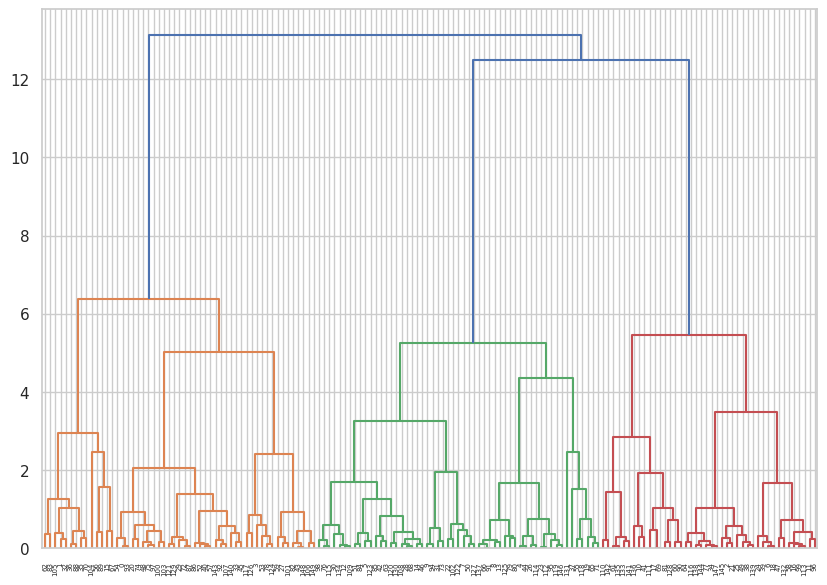

Number of Clusters :  3
Number of Outliers :  0
Silhouette Score :  0.34776410310521394


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Contoh data, ganti dengan data asli Anda
# Misalnya, df_cluster adalah DataFrame dengan dua fitur
np.random.seed(42)
df_cluster = pd.DataFrame(np.random.randn(150, 2), columns=['feature1', 'feature2'])

# Plot dendrogram untuk membantu menentukan jumlah cluster yang optimal
linked = linkage(df_cluster, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

# Pilih jumlah cluster berdasarkan dendrogram
n_clusters = 3  # Ganti dengan jumlah cluster yang diinginkan berdasarkan dendrogram

# Gunakan AgglomerativeClustering untuk mengelompokkan data
agg_clust = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = agg_clust.fit_predict(df_cluster)

# Evaluasi hasil clustering
n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)  # Hierarchical Clustering tidak memberikan label -1 untuk outliers

print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

# Jika diperlukan, hitung silhouette score untuk evaluasi clustering
if n_clusters_ > 1:
    sil_score = silhouette_score(df_cluster, labels)
    print('Silhouette Score : ', sil_score)
else:
    print('Silhouette Score : Not applicable for single cluster')


In [ ]:
## K-Modes

## K-modes Huang

In [ ]:
db = np.array(df)
cost = []
for nb_clusters in list(range(1,11)):
    kmode = KModes(n_clusters = nb_clusters, init = 'Huang', n_init = 1, verbose = 1)
    kmode.fit_predict(db)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 867.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 773.0
Run 1, iteration: 2/100, moves: 4, cost: 773.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 722.0
Run 1, iteration: 2/100, moves: 7, cost: 722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 725.0
Run 1, iteration: 2/100, moves: 15, cost: 703.0
Run 1, iteration: 3/100, moves: 13, cost: 701.0
Run 1, iteration: 4/100, moves: 0, cost: 701.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26, cost: 671.0
Run 1, iteration: 2/100, moves: 18, cost: 656.0
Run 1, iteration: 3/100, moves: 8, cost: 656.0
Init: initializing centroids


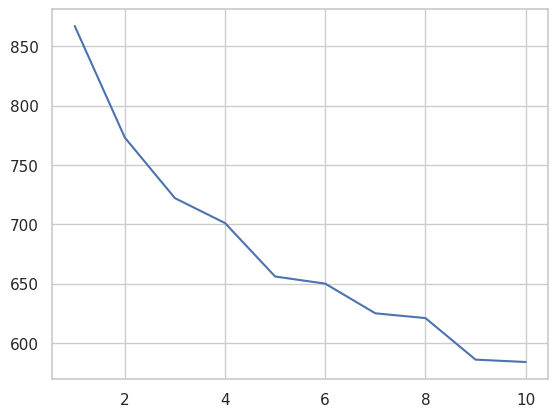

In [ ]:
y = np.array([i for i in range(1, 11, 1)])
plt.plot(y, cost)

In [ ]:
km = KModes(n_clusters = 2, init = 'Huang', n_init = 1, verbose = 1)
fitClusters = km.fit_predict(db)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 41, cost: 774.0
Run 1, iteration: 2/100, moves: 14, cost: 774.0


In [ ]:
km2 = KModes(n_clusters = 3, init = 'Huang', n_init = 1, verbose = 1)
fitClusters = km2.fit_predict(db)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 20, cost: 743.0
Run 1, iteration: 2/100, moves: 4, cost: 743.0


In [ ]:
db = df2.reset_index()
clusters_df = pd.DataFrame(fitClusters)
clusters_df.columns = ['clusters_pred']
db_w_clusters = pd.concat([db, clusters_df], axis = 1).reset_index()
db_w_clusters = db_w_clusters.drop(['level_0', 'index'], axis = 1)
db_w_clusters.head()

,Usia,Jenis Kelamin,Angkatan,alasan,kepuasan,prioritas_liniear,minat_karir,bidang,lingkungan,faktor_gaji,faktor_lokasi,faktor_pengembangan,faktor_stabilitas,faktor_luar,kemampuan,magang,clusters_pred
0,20,Perempuan,2022,Peluang karir,3,4,Business Intelligence Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,3,3,2,3,Belum,1
1,19,Perempuan,2022,Peluang karir,3,2,Data Analyst,Teknologi Informasi,Kombinasi WFH & WFO,3,2,2,3,2,1,Belum,0
2,19,Perempuan,2022,Rekomendasi keluarga atau teman,3,3,Data Scientist,Teknologi Informasi,Kombinasi WFH & WFO,4,4,4,4,3,2,Belum,0
3,20,Perempuan,2022,Peluang karir,4,4,Data Engineer,Pemerintahan,Kombinasi WFH & WFO,5,3,4,5,5,3,Belum,1
4,19,Perempuan,2022,Peluang karir,4,5,Data Scientist,Keuangan,Remote Work,4,4,5,5,5,3,Belum,1


In [ ]:
print("\nPersebaran Nilai:")
print(db_w_clusters['clusters_pred'].value_counts())


Persebaran Nilai:
clusters_pred
1    45
0    45
2    21
Name: count, dtype: int64


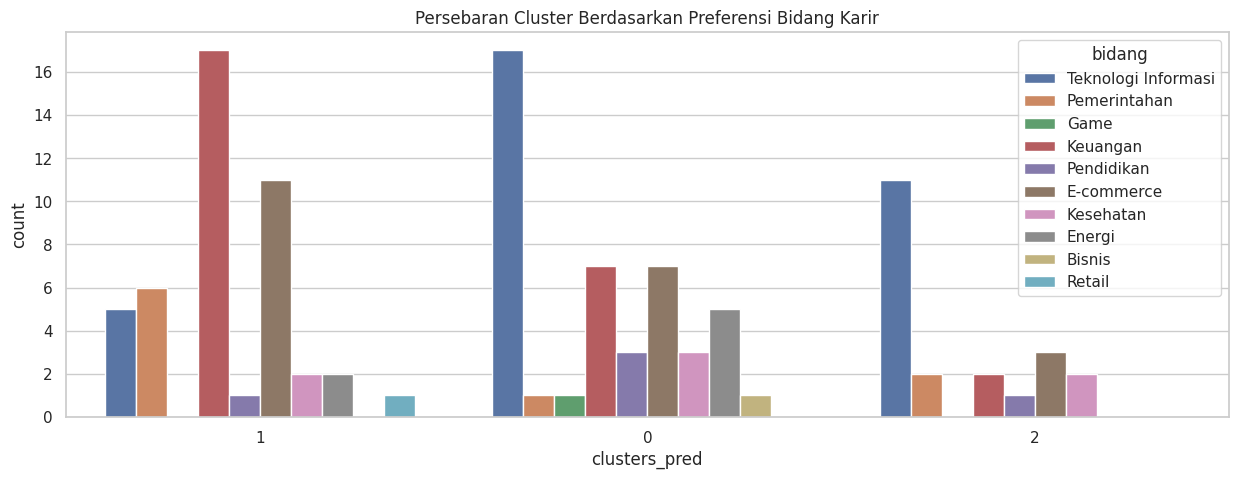

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['bidang'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Bidang Karir')
plt.show()


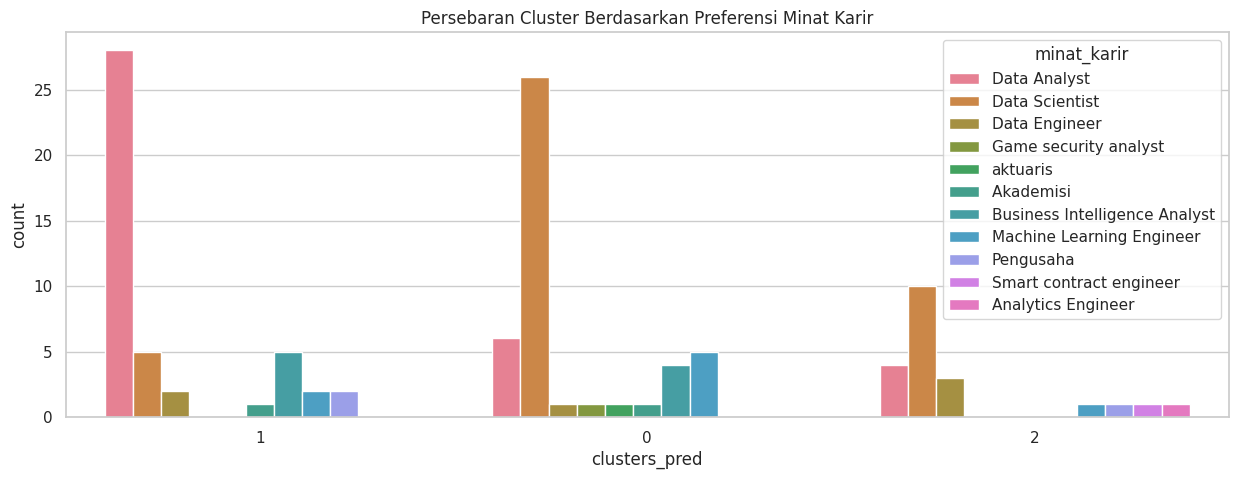

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['minat_karir'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Minat Karir')
plt.show()

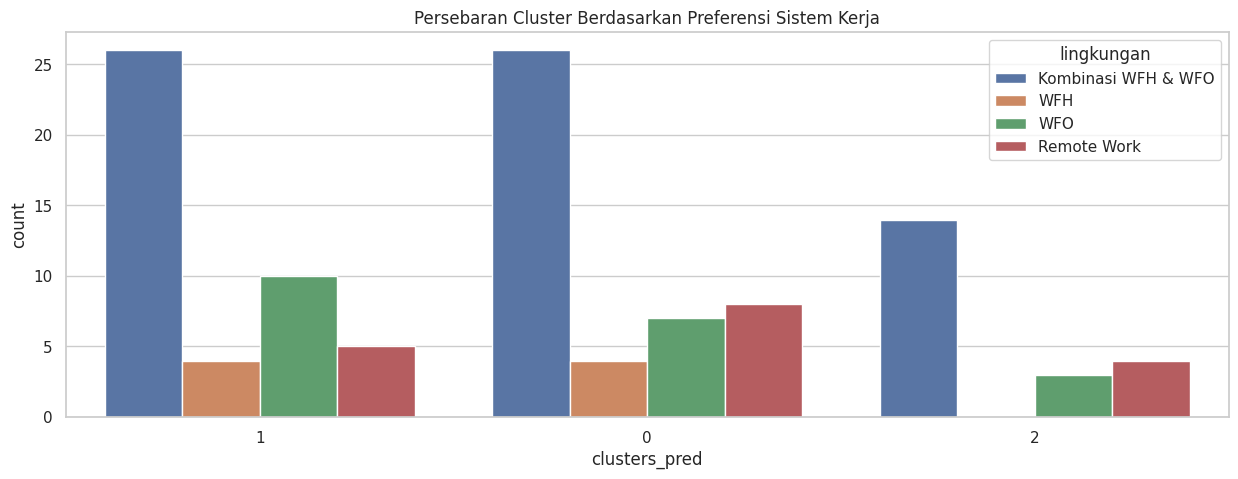

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['lingkungan'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Sistem Kerja')
plt.show()

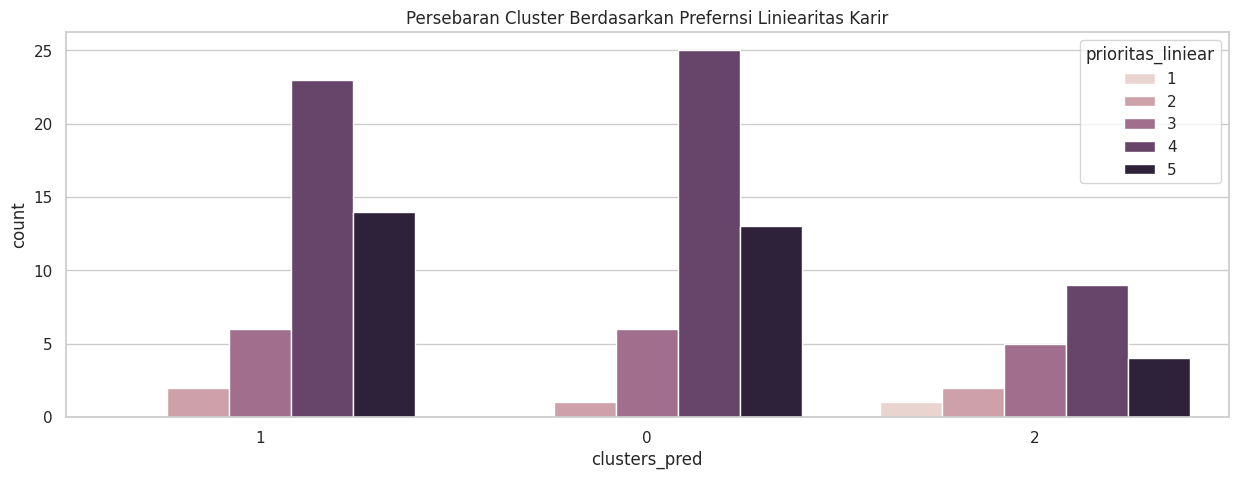

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['prioritas_liniear'])
plt.title('Persebaran Cluster Berdasarkan Prefernsi Liniearitas Karir')
plt.show()

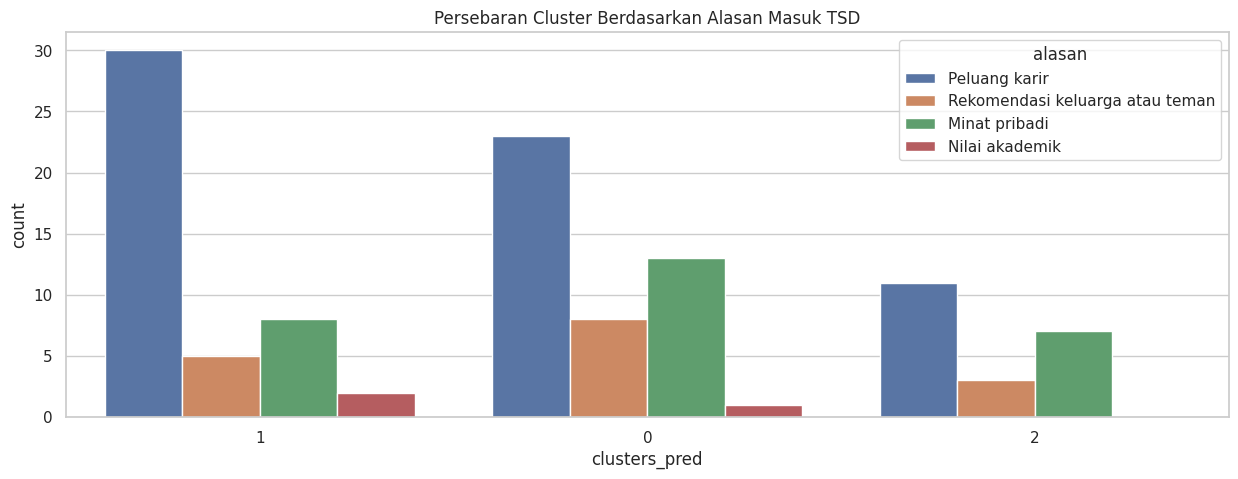

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['alasan'])
plt.title('Persebaran Cluster Berdasarkan Alasan Masuk TSD')
plt.show()

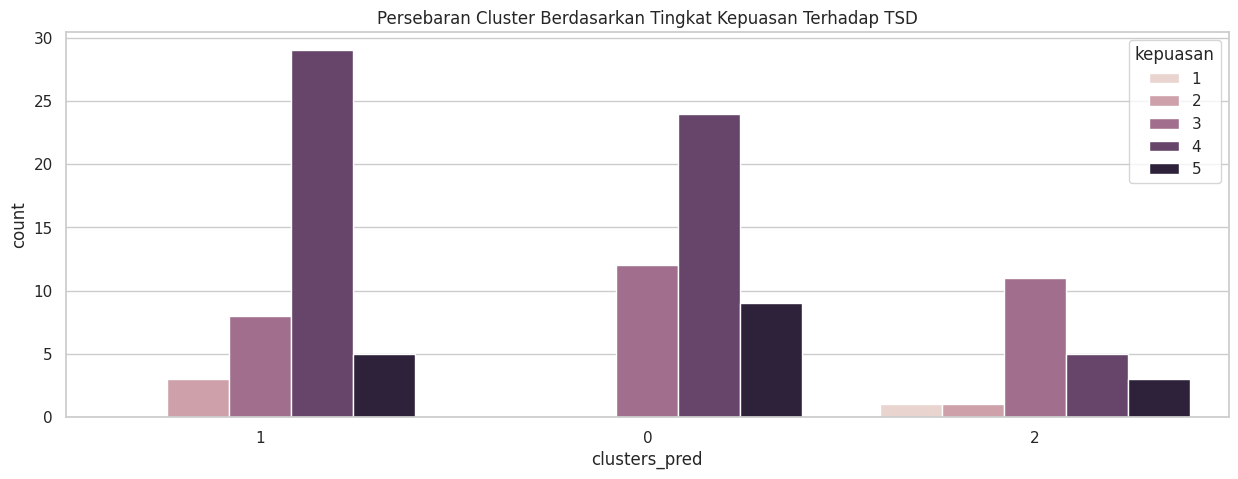

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['kepuasan'])
plt.title('Persebaran Cluster Berdasarkan Tingkat Kepuasan Terhadap TSD')
plt.show()

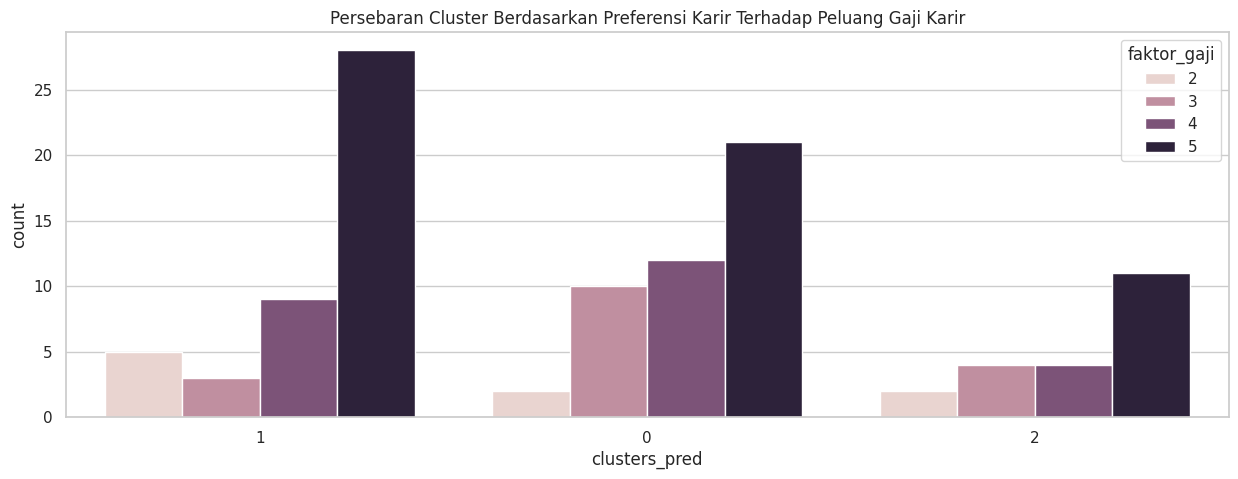

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['faktor_gaji'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Karir Terhadap Peluang Gaji Karir')
plt.show()

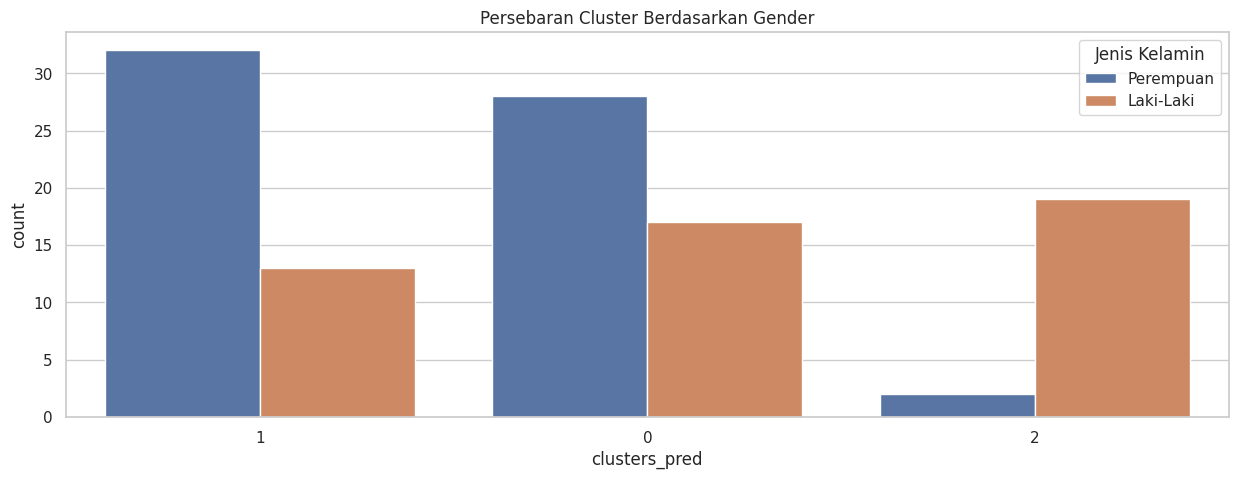

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['Jenis Kelamin'])
plt.title('Persebaran Cluster Berdasarkan Gender')
plt.show()

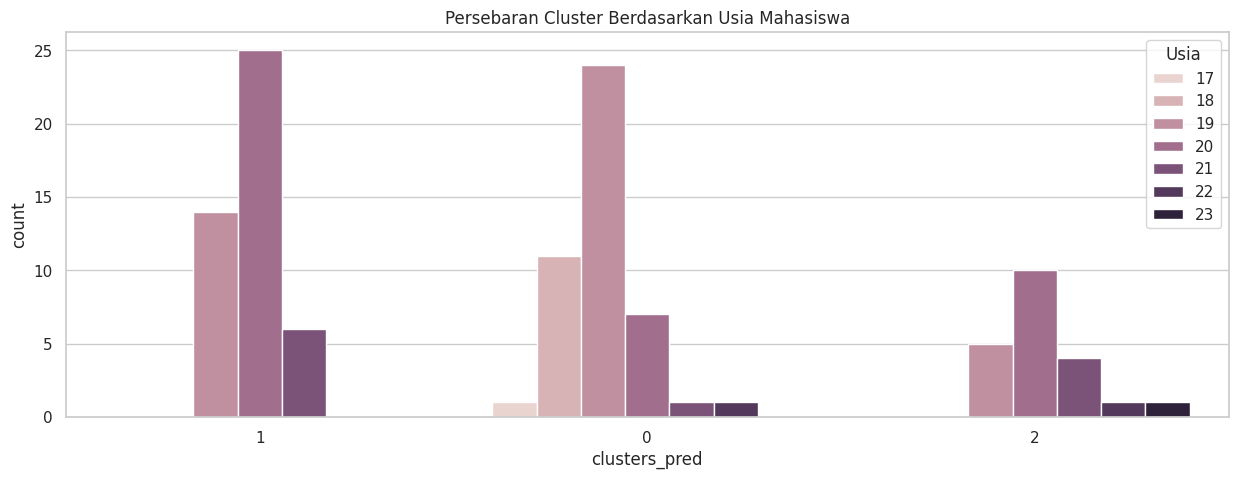

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['Usia'])
plt.title('Persebaran Cluster Berdasarkan Usia Mahasiswa')
plt.show()

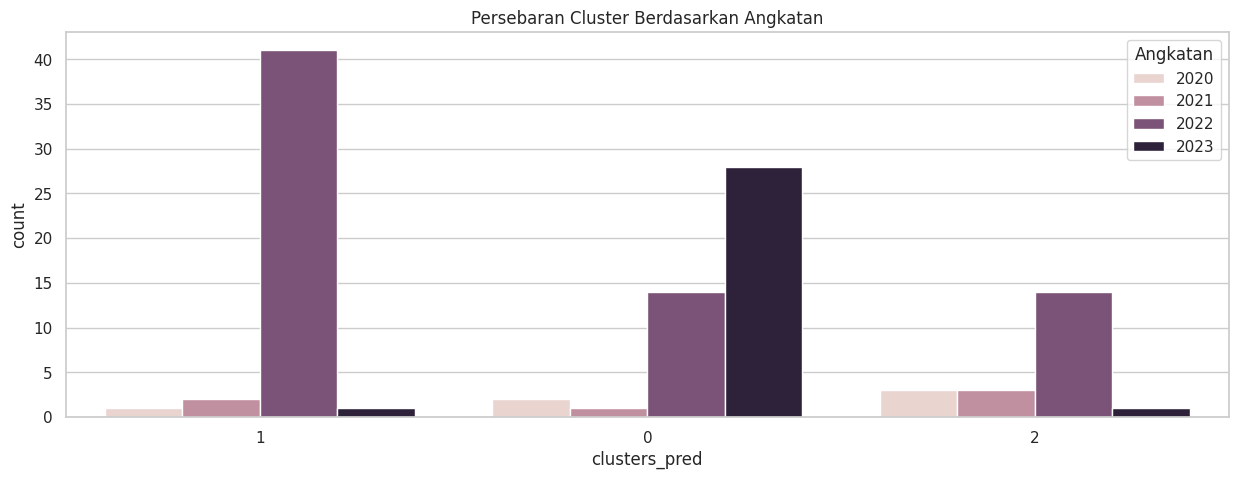

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['Angkatan'])
plt.title('Persebaran Cluster Berdasarkan Angkatan')
plt.show()

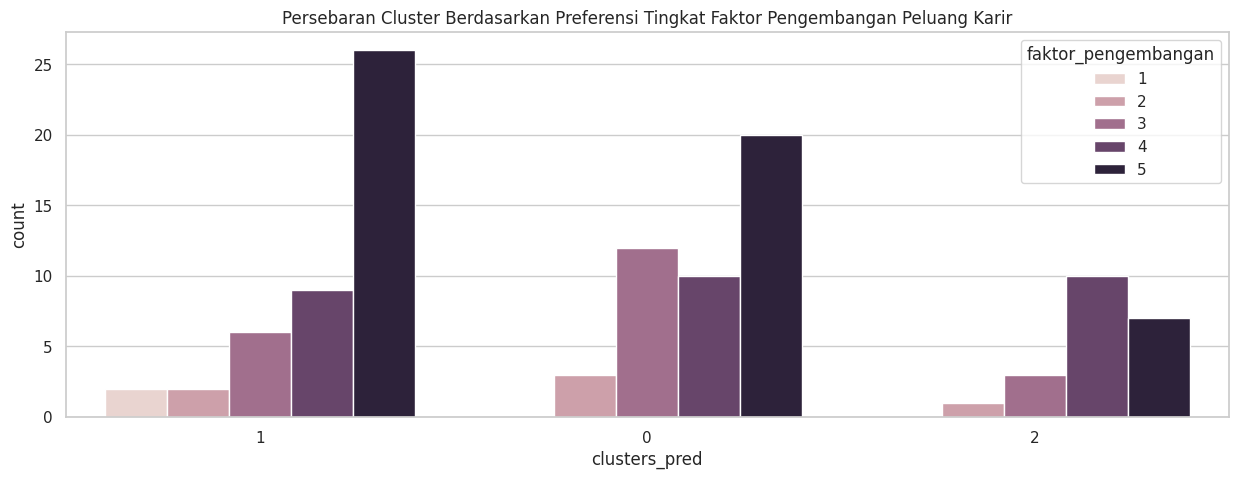

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['faktor_pengembangan'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Tingkat Faktor Pengembangan Peluang Karir')
plt.show()

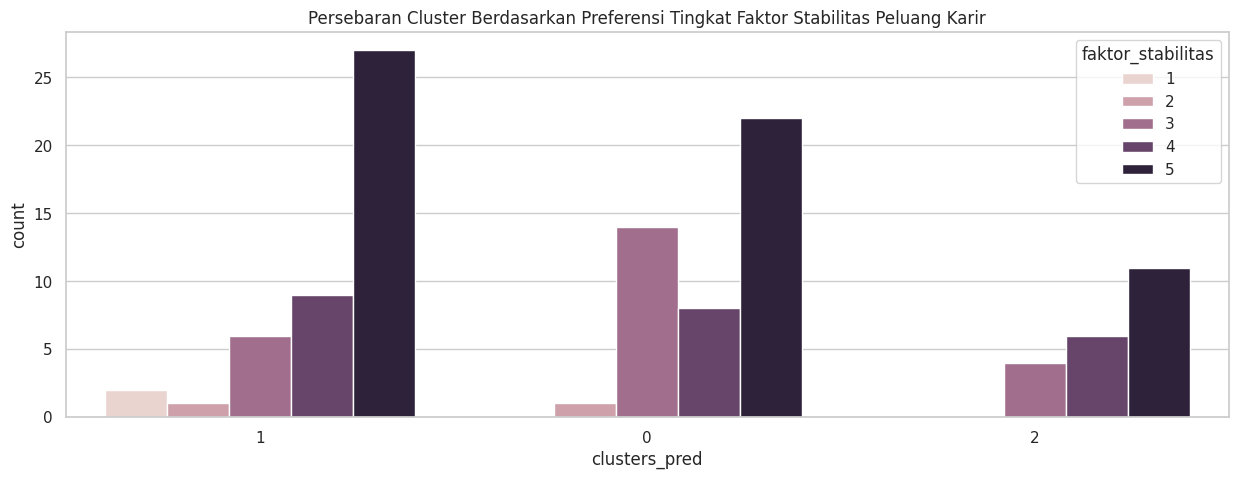

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['faktor_stabilitas'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Tingkat Faktor Stabilitas Peluang Karir')
plt.show()

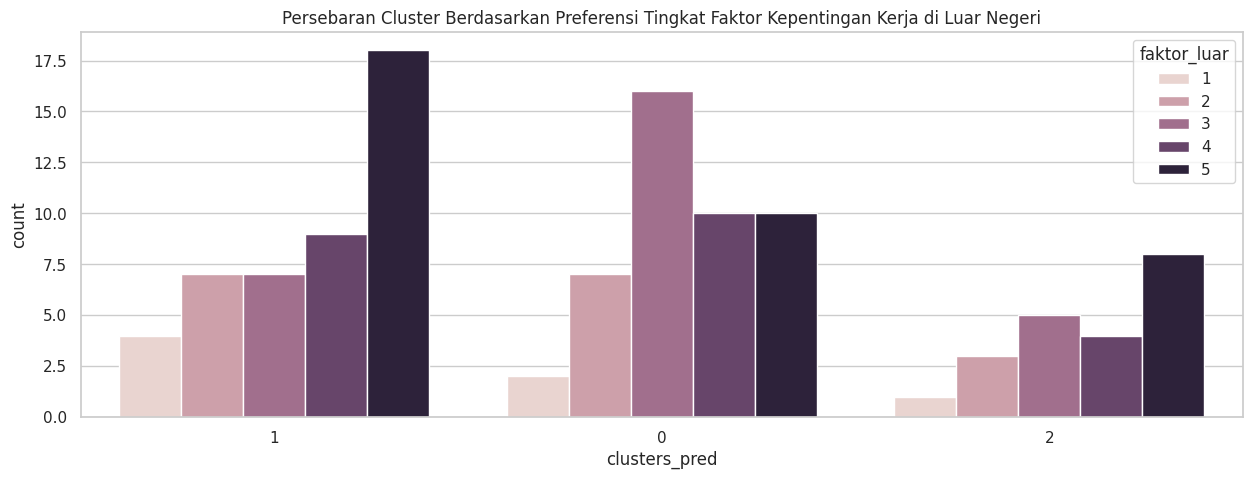

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['faktor_luar'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Tingkat Faktor Kepentingan Kerja di Luar Negeri')
plt.show()

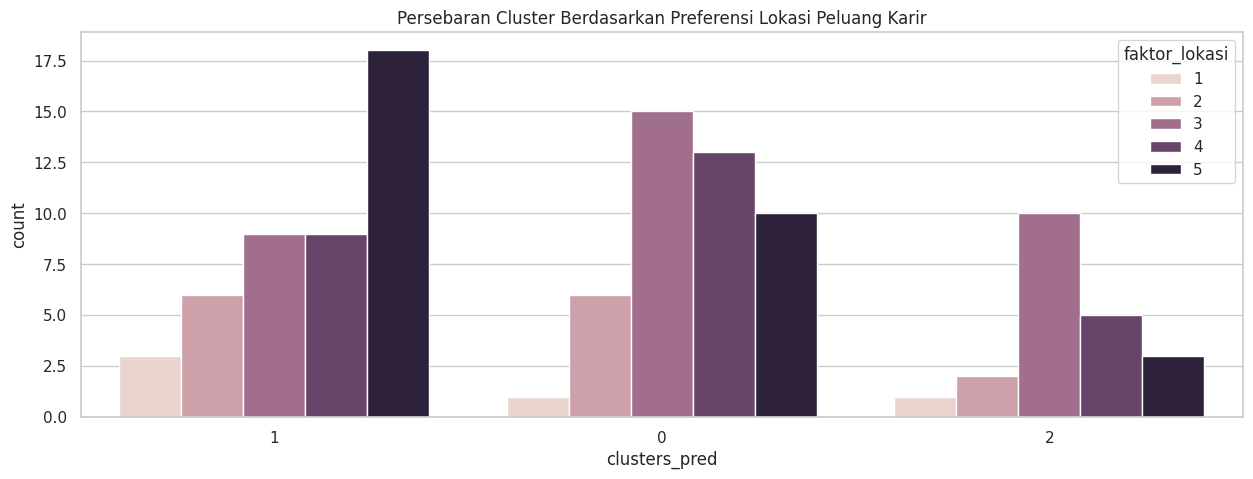

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['faktor_lokasi'])
plt.title('Persebaran Cluster Berdasarkan Preferensi Kepentingan Lokasi Peluang Karir')
plt.show()

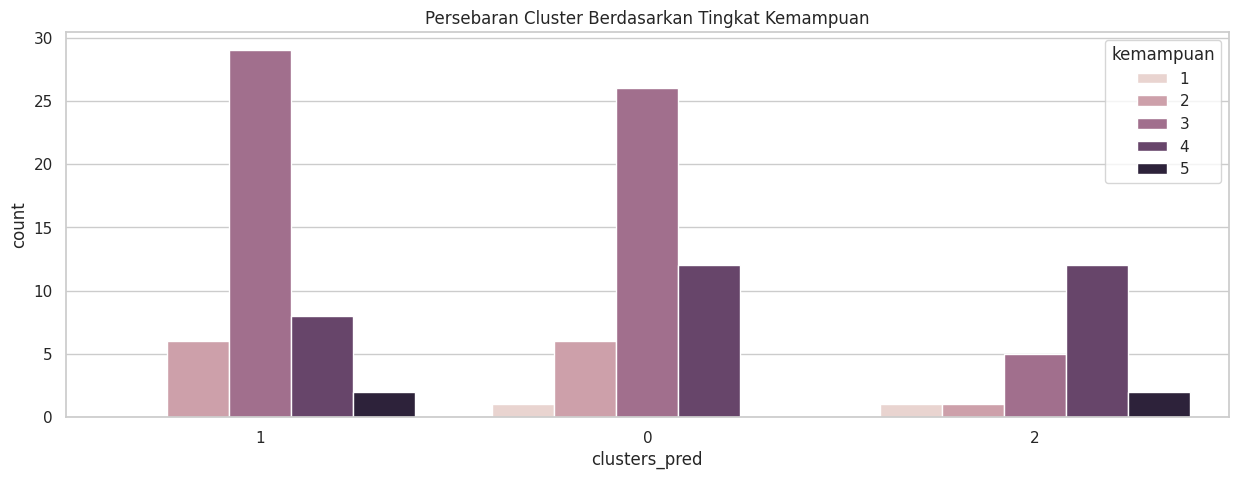

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['kemampuan'])
plt.title('Persebaran Cluster Berdasarkan Tingkat Kemampuan')
plt.show()

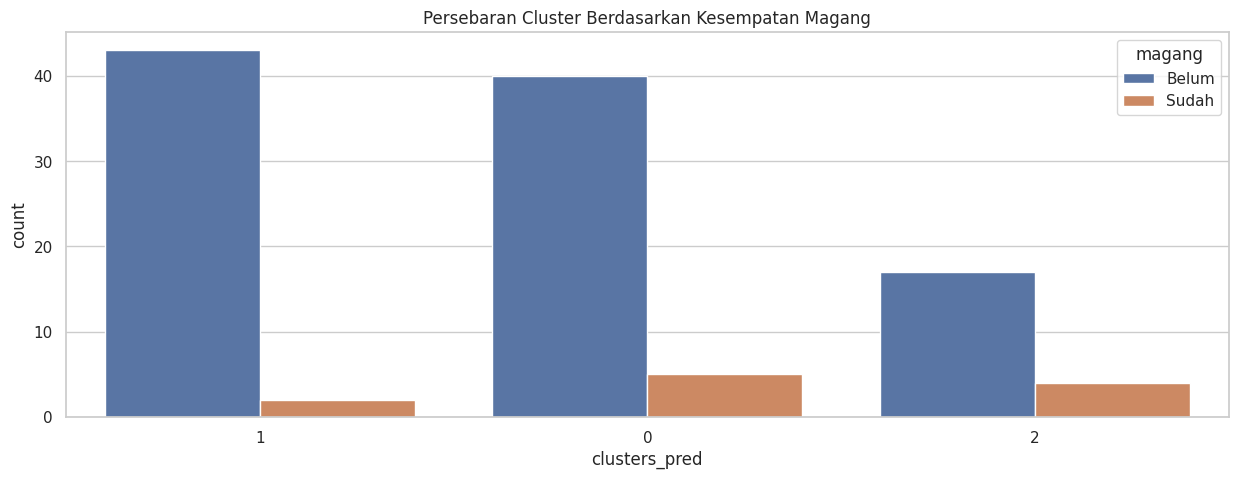

In [ ]:
plt.subplots(figsize=(15, 5))
sns.countplot(x=db_w_clusters['clusters_pred'],
              order=db_w_clusters['clusters_pred'].value_counts().index,
              hue=db_w_clusters['magang'])
plt.title('Persebaran Cluster Berdasarkan Kesempatan Magang')
plt.show()